In [29]:
import pandas as pd

In [30]:
df = pd.read_csv("SMSSpamCollection", sep="\t", names= ["label", "text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df.shape

(5572, 2)

In [32]:
import nltk
nltk.download('stopwords')
nltk.download("punkt")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sukhd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sukhd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [33]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
sw = stopwords.words("english")
ps = PorterStemmer()

In [34]:
def ct(text):
    tokens = word_tokenize(text)
    clean = [word for word in tokens if word.isdigit() or word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in sw]
    return clean

In [35]:
ct("hello i am aditya i am going to schools")

['hello', 'aditya', 'go', 'school']

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [37]:
tfid = TfidfVectorizer(analyzer=ct)

In [38]:
x = df['text']
y = df['label']

In [39]:
x_new = tfid.fit_transform(x)

In [41]:
x_new.shape

(5572, 6513)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, random_state=0, test_size=0.25)

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [45]:
nb.fit(x_train.toarray(), y_train)

GaussianNB()

In [47]:
y_p = nb.predict(x_test.toarray())

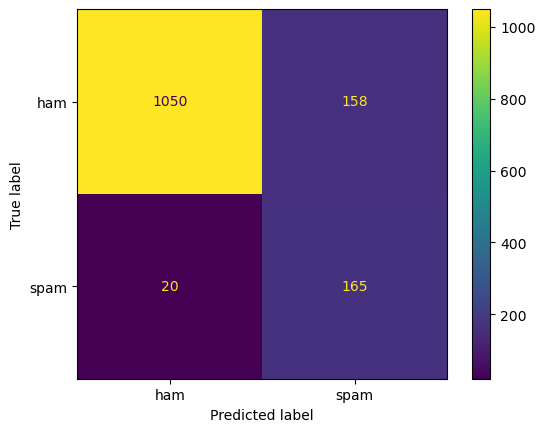

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_p)

In [49]:
from sklearn.metrics import accuracy_score, classification_report

In [50]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

         ham       0.98      0.87      0.92      1208
        spam       0.51      0.89      0.65       185

    accuracy                           0.87      1393
   macro avg       0.75      0.88      0.79      1393
weighted avg       0.92      0.87      0.89      1393



In [51]:
accuracy_score(y_test, y_p)

0.8722182340272793

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
rf = RandomForestClassifier(random_state=0)

In [54]:
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=0)

In [55]:
y_p = rf.predict(x_test)

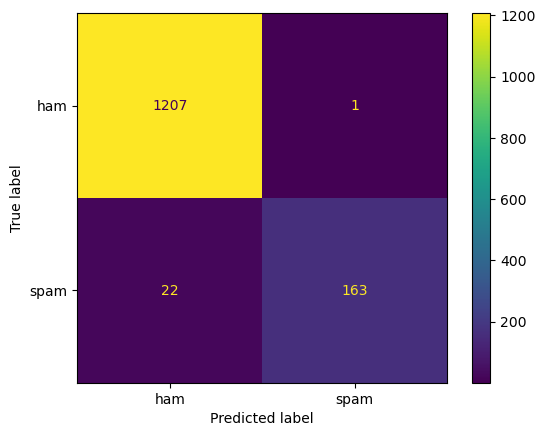

In [56]:
ConfusionMatrixDisplay.from_predictions(y_test, y_p)

In [57]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.88      0.93       185

    accuracy                           0.98      1393
   macro avg       0.99      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



In [58]:
accuracy_score(y_test, y_p)

0.9834888729361091

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
params = {}

In [61]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_features': ['sqrt', 'log2'],
    'random_state': [0, 1, 3, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

In [62]:
grid = GridSearchCV(rf, param_grid=params, cv = 5, scoring="accuracy")

In [63]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'random_state': [0, 1, 3, 4]},
             scoring='accuracy')

In [65]:
 rf = grid.best_estimator_

In [66]:
y_p = rf.predict(x_test)

In [67]:
accuracy_score(y_test, y_p)

0.9791816223977028